Alpha (α), Beta (ß), Gamma (Γ), Delta (δ), Epsilon (ε), Theta (Θ), Omega (Ω), Pi (π), Mu (µ), Sigma (Σ, σ), Tau (τ), Phi (Φ, φ). Dérivée: ∂

# Machine learning: concepts, étapes d'un projet et exemples

1. importer un Dataset (x, y) qui contient une target variable y ainsi qu'une ou plusieurs feature variables x.
2. Développer un modèle avec des paramètres aléatoires. C'est comme développer une fonction mathématique qui prend les variables x pour tenter de prédire la variable y.
3. Développer une Fonction Coût, qui mesure l'ensemble des erreurs entre notre modèle et le Dataset (x, y).
4. Développer un algorithme de minimisation de la fonction coût, qui trouve quels sont les paramètres optimaux pour notre modèle.

# Linear Regression

Fonction coût :
J(a,b) = 1/2m  i∑m (f(x(i) - y(i))2 (MSE)
Cette fonction de coût étant une somme de carrés, elle ressemblera à une fonction carré (allure parabolique).
On cherche ensuite à minimiser cette fonction. 

Deux manières:

MCO = trouver la tangeante horizontale (ie, trouve la dérivée DJ/Dx = 0). Cela nécessite une inversion de matrice, qui peut être très compliquée si la matrice est très grande

Descente de gradient, je prends un point sur la courbe puis par petite itération, j'essaie de faire tendre ma dérivée vers 0, ie de trouver la tangente horizontale. 

## Descente de gradient 

-> Sert à obtenir le minimum d'une fonction convexe (allure parabolique- ie vallée). Si la fonctin n'est pas convexe, elle peut avoir des minimums locaux.

"On est en haut d'une vallée, on cherche l'angle le plus pentu puis on avance tout droit sur la distance. Une fois arrivé, on regarde de nouveau autour de nous, puis on identifie l'angle le plus pentu, et on avance de nouveau tout droit sur la distance". 

Algorithme itératif de cette formule:
a(i+1) = a(i) - α (∂ J(ai)/ ∂ a)

L'hyperparamètre α (le learning rate) est toujours positif.

Si l'on se retrouve sur la partie gauche de la courbe convexe, la dérivée est négative. 

On se place sur la courbe d'une fonction convexe et on avance par pas en recalculant la dérivée à chaque pas. Dans l'équation, on a donc une dérivée négative et un α positif donc le produit est négatif. A chaque Itération, on a donc a1 > aO et a1-a0 = α(∂ J(ai)/ ∂ a).

Dans le cas ou a0 est sur la partie droite de la courbe convexe, c'est l'inverse, l'itération nous donne un a1<a0 car la dérivée est positive et α est positif également.

Dans tous les cas, l'itération converge vers une dérivée nulle, la tangeante horizontale de la courbe convexe. 

Le choix de α est très important car il est possible que l'itération oscille toujours autour du minimum sans le trouver. Si il est trop faible, on risque de mettre trop longtemps à trouver le minimum. 

Il faut enfin calculer les dérivés:

Pour rappel, la fonction coût : J(a,b) = 1/2m i∑m (f(x(i) - y(i))2
RAPPEL dérivés: (g ° f)' = f' * g'(f)  

(∂ J/ ∂ a) = 1/m ∑ x(ax + b - y)
(∂ J/ ∂ b) = 1/m ∑ 1(ax + b - y) = 1/m ∑ (ax + b - y)

## Forme Matricielle

f(xi) = a(xi)+b

n = nombre de variable, ici 1, cest x

m = nombre de valeur dans notre dataset

b -> biais.  

Vecteur f(xi) = X produitmat Θ = X.Θ

Θ ((n+1) * 1)-> vecteur qui contient a et b 

X (dim: m * (n+1))-> matrice qui contient tous les éléments 

x(i) jusque x(n) et une colonne remplie de 1.

Quand on fait le produit mat on a bien =
f((x1) = X

----------------------Fonction coût:

J(a,b) = 1/2m i∑m (ax(i)+b - y(i))2 

On place tous les y(i) dans un vecteur Y

J(a,b) = 1/2m i∑m (X.Θ - Y)2

X.Θ - Y nous donne une matrice m * 1, on applique le carré sur chaque élément, puis on somme les éléments puis on multiplie le résultat par 1/2m et on a bien un résultat 1 * 1.

----------------------Gradient Forme Matricielle:

Gradient-forme matricielle:
(∂ J(Θ)/ ∂ Θ) = 1/m X.T (X.Θ - Y)

X -> dimension m * (n+1) car on a une colonne de 1

X.T -> dimension (n+1) * m qui permet d'obtenir les différents gradients. 

Quand on incorpore dans la déscente de gradient:

Θ = Θ - α (∂J)/(∂Θ)

Les régressions polynomiales ne sont alors plus un problème car on a écrit tout ça en forme matricielle. 

Pour ax2+bx+c on a toujours F = XΘ

Θ = vecteur avec a,b,c

X -> dimension: m * (n+1)

Exemple: la première de X: x(1)2 x(1) 1

Donc quand il y aura le produit matriciel avec Θ:

On aura: f(x1) = ax(1)2 + bx(1) + 1*c = ax(1)2 + bx(1) + c


## Linear Regression Numpy

In [51]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [54]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)

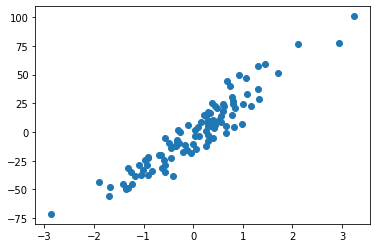

In [55]:
plt.scatter(x,y)

xshape:  (100, 1)
yshape:  (100, 1)
yshape after reshape:  (100, 1)
shape after dot: (100, 1)
before optimization:


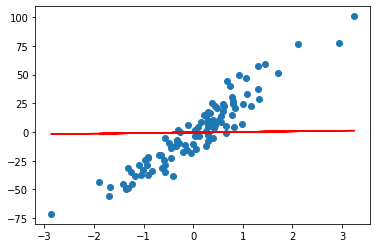

In [68]:
print('xshape: ', x.shape)
print('yshape: ', y.shape)
y=y.reshape(100,1)
print('yshape after reshape: ', y.shape)

X = np.hstack((x, np.ones(x.shape)))
theta = np.random.randn(2,1) #j'intialise avec des valeurs aléatoires un vecteur de dimension (2, 1) car j'ai a et b à trouver
#c'est ce théta qu'on cherche à trouver, ie les paramètres du modèle

#---------MODEL
def model(X, theta):
    return X.dot(theta)

print('shape after dot:', model(X, theta).shape)
print('before optimization:')
plt.scatter(x,y)
plt.plot(x, model(X, theta), c='r')


In [69]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)- y)**2)
cost_function(X,y, theta)

470.7815322184963

In [80]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) -y)

#descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

theta_final, cost_histo = gradient_descent(X, y, theta, 0.01, 1000)

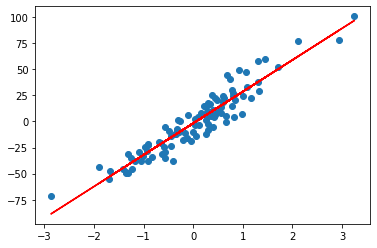

In [79]:
predictions = model(X, theta_final)
plt.scatter(x,y)
plt.plot(x, predictions, c='r')

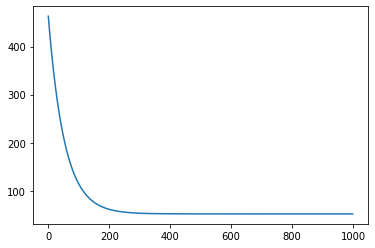

In [81]:
plt.plot(range(1000), cost_histo) #on voit comment la machine minimise
#la fonction coût avec l'algo de descente de gradient

In [82]:
#R2
def coeff_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v
coeff_determination(y, predictions)

0.892626271455736

## Régression Polynomiale Multiple avec numpy

xshape:  (100, 1)
yshape:  (100,)
yshape after reshape:  (100, 1)
shape after dot: (100, 1)
before optimization:


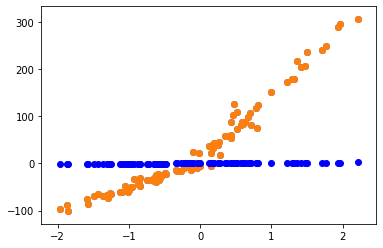

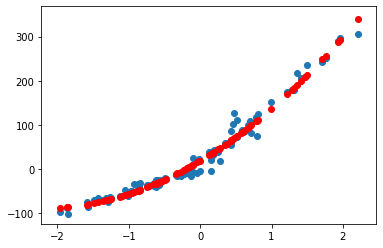

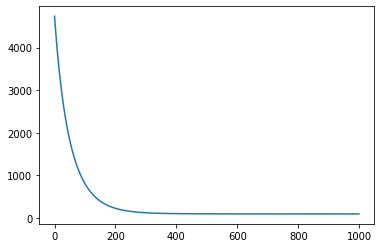

0.9793953113492835

In [95]:
#La seule chose qui change ici c'est le rajout dans X d'une colonne x**2
#et la redimension de theta en (3,1) plutot que (2,1)

import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2)
plt.scatter(x,y)

print('xshape: ', x.shape)
print('yshape: ', y.shape)
y=y.reshape(100,1)
print('yshape after reshape: ', y.shape)

X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
theta = np.random.randn(3,1) #j'intialise avec des valeurs aléatoires un vecteur de dimension (2, 1) car j'ai a et b à trouver
#c'est ce théta qu'on cherche à trouver, ie les paramètres du modèle

#---------MODEL
def model(X, theta):
    return X.dot(theta)

print('shape after dot:', model(X, theta).shape)
print('before optimization:')
plt.scatter(x,y)
plt.scatter(x, model(X, theta), c='b')
plt.show()

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)- y)**2)
cost_function(X,y, theta)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) -y)

#descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

theta_final, cost_histo = gradient_descent(X, y, theta, 0.01, 1000)

predictions = model(X, theta_final)

plt.scatter(x[:,0],y)
plt.scatter(x[:,0], predictions, c='r')
plt.show()


plt.plot(range(1000), cost_histo) #on voit comment la machine minimise
#la fonction coût avec l'algo de descente de gradient
plt.show()
#R2
def coeff_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v

coeff_determination(y, predictions)

## Régression multiple avec numpy

xshape:  (100, 2)
yshape:  (100,)
yshape after reshape:  (100, 1)
shape after dot: (100, 1)
before optimization:


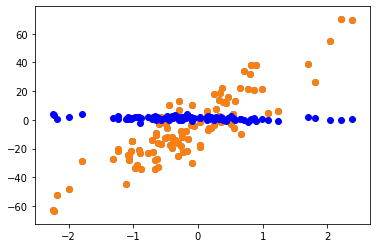

after optimization:
y en fonction de x1


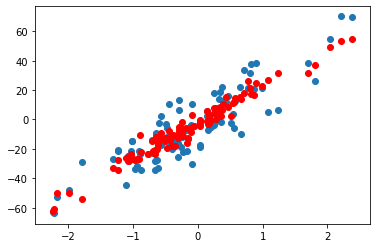

y en fonction de x2


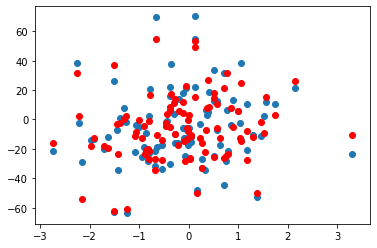

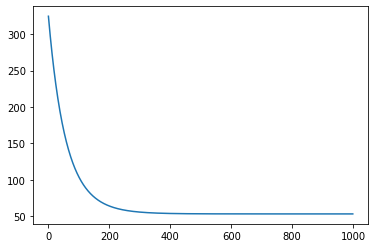

0.8164529935999151

In [105]:
#On passe n_features à 2
#x devient une matrice et non plus un vecteur.
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
x, y = make_regression(n_samples=100, n_features=2, noise=10)
plt.scatter(x[:,0], y)

print('xshape: ', x.shape)
print('yshape: ', y.shape)
y=y.reshape(100,1)
print('yshape after reshape: ', y.shape)

X = np.hstack((x, np.ones((x.shape[0],1))))#on veut qu'une seule colonne de 1
#X = np.hstack((x**2, X))
theta = np.random.randn(3,1) #j'intialise avec des valeurs aléatoires un vecteur de dimension (2, 1) car j'ai a et b à trouver
#c'est ce théta qu'on cherche à trouver, ie les paramètres du modèle
 
#---------MODEL
def model(X, theta):
    return X.dot(theta)

print('shape after dot:', model(X, theta).shape)
print('before optimization:')
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], model(X, theta), c='b')
plt.show()

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)- y)**2)
cost_function(X,y, theta)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) -y)

#descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

theta_final, cost_histo = gradient_descent(X, y, theta, 0.01, 1000)

predictions = model(X, theta_final)
print('after optimization:')
print('y en fonction de x1')
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], predictions, c='r')
plt.show()

print('y en fonction de x2')
plt.scatter(x[:,1],y)
plt.scatter(x[:,1], predictions, c='r')
plt.show()


plt.plot(range(1000), cost_histo) #on voit comment la machine minimise
#la fonction coût avec l'algo de descente de gradient
plt.show()
#R2
def coeff_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v

coeff_determination(y, predictions)

# SKlearn - ML

On sélectionne un estimateur et on précise ses hyperparamètres. Fit / Score / Predict. Carte des modèles : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

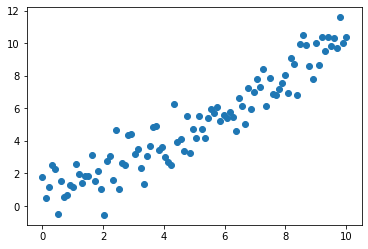

In [9]:
np.random.seed(0)
m=100 #100 samples
X =np.linspace(0,10,m).reshape(m,1)
y = X + np.random.randn(m,1)
plt.scatter(X,y)

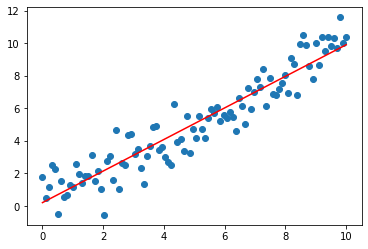

In [10]:
from sklearn.linear_model import LinearRegression
model  = LinearRegression() #Pas d'hyperparamètres ici
model.fit(X,y)
model.score(X,y) #Le résultat ici est le coefficient de détermination, donc le R2
predictions = model.predict(X)
plt.scatter(X,y)
plt.plot(X, predictions,c='r')

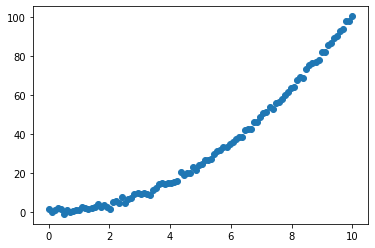

In [4]:
np.random.seed(0)
m=100 #100 samples
X =np.linspace(0,10,m).reshape(m,1)
y = X**2 + np.random.randn(m,1)
plt.scatter(X,y)

/Users/Maxime/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


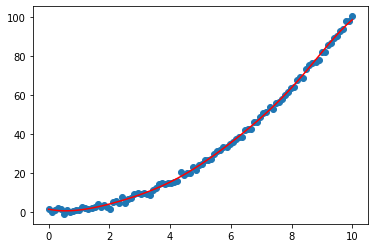

In [5]:
from sklearn.svm import SVR
model  = SVR(C=100) #Pas d'hyperparamètres ici
model.fit(X,y)
model.score(X,y) #Le résultat ici est le coefficient de détermination, donc le R2
predictions = model.predict(X)
plt.scatter(X,y)
plt.plot(X, predictions, c='r')

## Make_Scorer

Développer ses propres métriques. On peut dvp ses propres modèles mais il faut la transformer avec make_scorer pour pouvoir l'utiliser dans gridsearch ou crossvalidation.

In [11]:
def custom_metric(y, y_pred):
    return np.sum((y_pred < y + y*0.2) & (y_pred > y - y*0.2))/y.size
custom_metric(y, predictions)

0.64

In [12]:
from sklearn.metrics import make_scorer

In [13]:
custom_score = make_scorer(custom_metric, greater_is_better=True)

In [15]:
from sklearn.model_selection import cross_val_score, GridSearchCV

cross_val_score(LinearRegression(), X, y, cv=3, scoring=custom_score)

array([0.11764706, 0.66666667, 0.66666667])

In [2]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', degree=3)
params = {'gamma':np.arange(0.1, 1, 0.05)}

grid = GridSearchCV(model, param_grid=params, cv=3, 
                    scoring=custom_score)

grid.fit(X,y)



In [19]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X)
custom_metric(y, y_pred)

17.31

# Classification

In [3]:
import pandas as pd 
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male','female'], [0,1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [4]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20)
#On peut donner des 
y = titanic['survived']
X = titanic.drop('survived', axis=1)
model.fit(X,y)
model.score(X,y)
#précision du modèle de 83% pour savoir si un passager a survécu ou non

0.7633053221288515

In [6]:
def survie(model, pclass, sex, age):
    x = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))
survie(model, 3, 0, 38)


[0]
[[0.9 0.1]]


Bonne pratique en ML: séparer le dataset en TrainSet (80%) et TestSet (20%)

(150, 4)


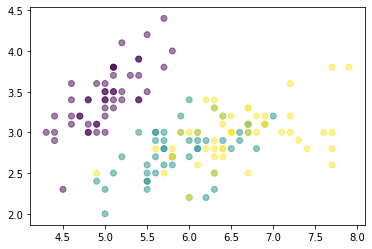

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
x=iris.data
y=iris.target
print(x.shape)
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.5)

## Train Test Split

(120, 4)
(30, 4)
(120,)
(30,)


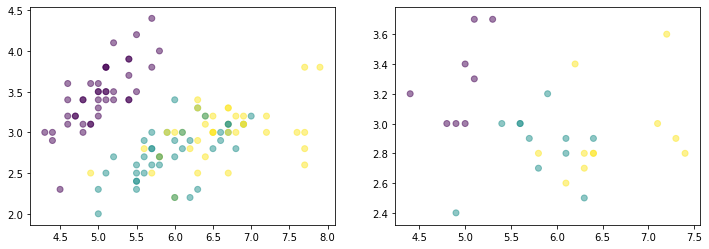

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5) #80% in train, 20% in test
#le paramètre random_state permet de maintenir le random comme random.seed
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.5)
plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.5)

Si on règle notre modèle pour optimiser le score du test set, on ne pourra plus l'utiliser pour calculer un score pour notre modèle. Il faut pour ça un validation set. Si on compare deux modèles de machine learning, on les jugera sur celui qui a la meilleur performance sur le validation set. Le test set nous permet de se rendre compte de sa performance dans la vraie vie. 

In [91]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
print('Train score :', model.score(X_train, y_train))
print('Test score :', model.score(X_test, y_test))

Train score : 0.9833333333333333
Test score : 0.9666666666666667


# Cross validation 

La cross validation nous permet d'entrainer le modèle sur plusieurs découpe du test set. On découpe le train set en 5 puis alternativement le validation set devient une des 5 parties du test set. On peut faire ensuite la moyenne des 5 configurations. --> Permet plus de robustesse lors d'un choix de modèle.

In [18]:
#KFOLD découpage simple puis on valide sur un et on train sur les autres mais par groupe
from sklearn.model_selection import cross_val_score #on peut découper le set de test en faisant de la cross validation
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold
cv = KFold(4, random_state=0)
cross_val_score(KNeighborsClassifier(10), X_train, y_train, cv=cv, scoring='accuracy').mean()

0.9833333333333334

In [15]:
#LEAVEONEOUT = On valide sur une valeur et train sur toutes les autres et ceux pour toutes les valeurs
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold
cv= LeaveOneOut() # Demande beaucoup de puissance au pc
cross_val_score(KNeighborsClassifier(10), X_train, y_train, cv=cv, scoring='accuracy')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [17]:
#ShuffleSplit = Découpage selon une proportion donnée du train set pour avoir un nombre de cross validation avec une 
#proportion de train et de validation
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold
cv= ShuffleSplit(4, test_size=0.2) # Créé des splits avec à chaque fois une petite portion d'une de nos classes, 
#pas de risque de se retrouver avec des cross validation ou il manque des classes, auquel cas c'est problematique
cross_val_score(KNeighborsClassifier(10), X_train, y_train, cv=cv, scoring='accuracy')

array([0.95833333, 0.95833333, 1.        , 1.        ])

In [16]:
#STRATIFIEDKFOLD = CHOIX ASSEZ SUR, CHOIX PAR DEFAULT
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold
cv= StratifiedKFold(4) # Créé des splits avec à chaque fois une petite portion d'une de nos classes, 
#pas de risque de se retrouver avec des cross validation ou il manque des classes, auquel c'est problematique
cross_val_score(KNeighborsClassifier(10), X_train, y_train, cv=cv, scoring='accuracy')

array([0.96774194, 0.96774194, 1.        , 0.92857143])

In [21]:
#GROUPKFOLD Pour les variables non indentiquement distribuées, il faut faire des groupes qui incluent cette "prédisposition" 
#lorsque l'on veut tester quelquechose.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold, GroupKFold
groups= X[:,0]
cv= GroupKFold(n_splits=5).split(X, y, groups) 
cross_val_score(KNeighborsClassifier(10), X_train, y_train, cv=cv, scoring='accuracy')

Là, on peut tester pour avoir le paramètres de notre modèle qui donne les meilleurs résultats sur le validation set

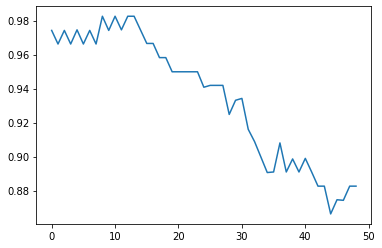

In [97]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)
plt.plot(val_score)

Mais on peut aussi le faire grâce à une méthode toute faite de sklearn... La validation curve

Ici, il faut faire attention aux problèmes d'overfitting. On s'en rend compte quand le score du train set est largement suppérieur à celui du validation set. 

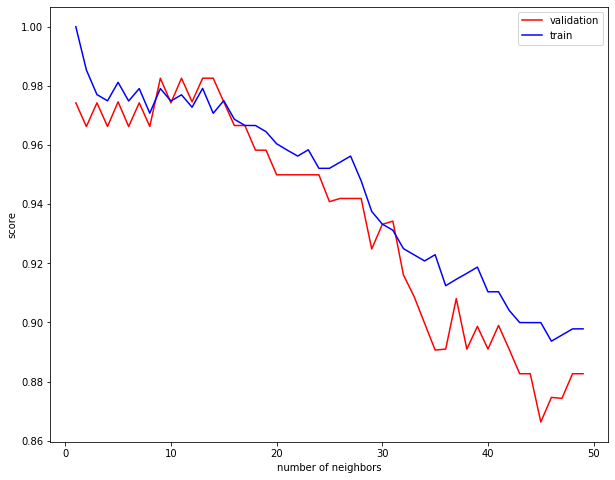

In [103]:
from sklearn.model_selection import validation_curve
model = KNeighborsClassifier()
k = np.arange(1, 50)
train_score, validation_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)
plt.figure(figsize=(10,8))
plt.plot(k, validation_score.mean(axis=1), c='r', label='validation')
plt.plot(k, train_score.mean(axis=1), c='b', label='train')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('score')
plt.show()

Le mieux pour tester l'ensemble des hyperparamètres et pour améliorer le score est d'utiliser GridSearchCV, qui permet d'optimiser l'ensemble des hyperparams

In [105]:
from sklearn.model_selection import GridSearchCV

In [108]:
paramgrid = {'n_neighbors': np.arange(1,20),
            'metric' : ['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), paramgrid, cv=5)
grid.fit(X_train, y_train)

/Users/Maxime/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [109]:
grid.best_score_

0.9833333333333333

In [110]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 9}

In [111]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9666666666666667

In [114]:
from sklearn.metrics import confusion_matrix

Ici on compare en ligne le type de fleurs réel et en colonne le "rangement" effectué par l'algo. Autrement dit, ce qui n'est pas dans la diagonale correspond à une erreur de classification

In [115]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]])

## Learning Curve, Courbes d'apprentissage

Performance des modèles en fonction de la quantité de données qu'on lui fournit 

[ 10  20  30  40  51  61  71  81  91 102]


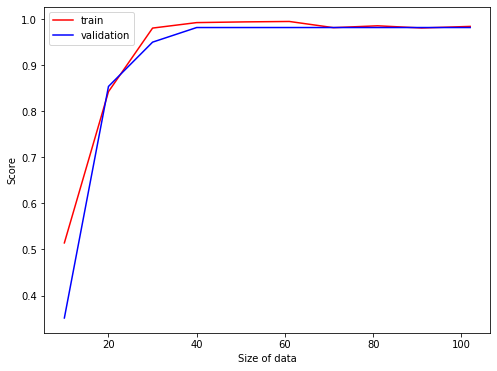

In [122]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=7)
print(N)
plt.figure(figsize=(8,6))
plt.plot(N, train_score.mean(axis=1), c='r', label='train')
plt.plot(N, val_score.mean(axis=1), c='b', label='validation')
plt.legend()
plt.xlabel('Size of data')
plt.ylabel('Score')
plt.show()

## Exercice Titanic

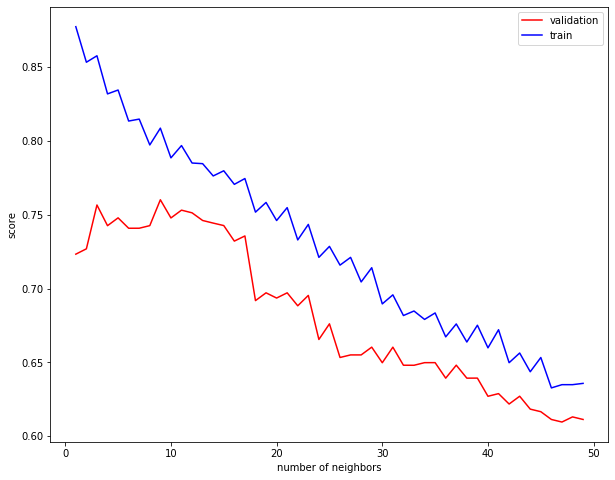

Grid Search Best Score & Best Params:
0.7775831873905429 {'metric': 'manhattan', 'n_neighbors': 11}
Score du model 0.7272727272727273
[[69 19]
 [20 35]]
Number:  [ 48  97 146 195 244 293 342 391 440 489]


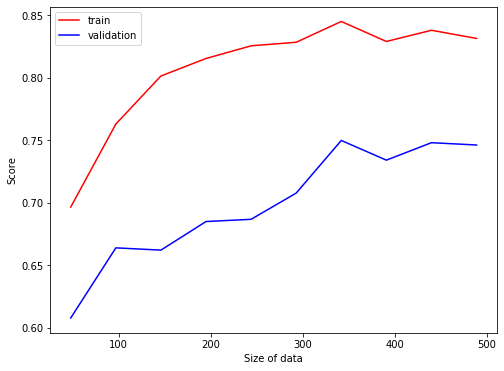

In [7]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier #model used here
from sklearn.model_selection import train_test_split #split du dataset
from sklearn.model_selection import validation_curve #validation curve
from sklearn.model_selection import GridSearchCV #best params for ML model
from sklearn.metrics import confusion_matrix #Matrice pour comprendre les résultats
from sklearn.model_selection import learning_curve #Le modèle serait-il meilleur avec plus de données ?

titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male','female'], [0,1], inplace=True)

y = titanic['survived']
X = titanic.drop('survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


model = KNeighborsClassifier()
model.fit(X_train, y_train)
k = np.arange(1, 50)
train_score, validation_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)
plt.figure(figsize=(10,8))
plt.plot(k, validation_score.mean(axis=1), c='r', label='validation')
plt.plot(k, train_score.mean(axis=1), c='b', label='train')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('score')
plt.show()

paramgrid = {'n_neighbors': np.arange(1,20),
            'metric' : ['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), paramgrid, cv=5)
grid.fit(X_train, y_train)
print('Grid Search Best Score & Best Params:')
print(grid.best_score_, grid.best_params_)

print('Score du model',model.score(X_test, y_test))
print(confusion_matrix(y_test, model.predict(X_test)))

N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=7)
print('Number: ', N)
plt.figure(figsize=(8,6))
plt.plot(N, train_score.mean(axis=1), c='r', label='train')
plt.plot(N, val_score.mean(axis=1), c='b', label='validation')
plt.legend()
plt.xlabel('Size of data')
plt.ylabel('Score')
plt.show()

##

## MSE MAE RMSE R2

MSE = Moyenne des erreurs au carré
RMSE = sqrt(MSE)
MAE = Moyenne de la valeur absolue des erreurs

On utilise la MSE quand on accorde une importance exponentielle à nos erreurs (un modèle qui piloterait une voiture accorderait 100 fois plus d'importance à une erreur de 10 mètres plutot qu'à une erreur de 1 mètre).

Si trop d'outliers: MAE
Il existe aussi la médiane absolute error (encore moins sensible aux outliers)

In [8]:
from sklearn.metrics import *
import numpy as np
y = np.array([1,2,3,4,7])
y_pred = np.array([5,4,3,4,1000])
print('Median AE ', median_absolute_error(y, y_pred))
print('Mean AE ', mean_absolute_error(y, y_pred))
print('MSE ', mean_squared_error(y, y_pred))
print('RMSE ', np.sqrt(mean_squared_error(y, y_pred))) #permet de remettre à l'échelle initiale

Median AE  2.0
Mean AE  199.8
MSE  197213.8
RMSE  444.0876039702076


## Histogramme des erreurs pour comprendre comment elles sont distribuées

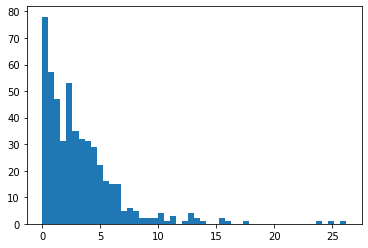

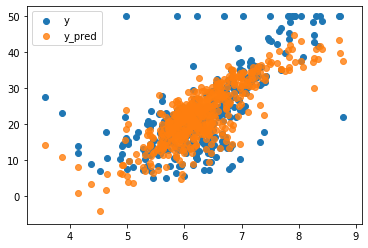

0.7406426641094095

In [14]:
from sklearn.datasets import load_boston #prix de l'immobilier à boston
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

boston = load_boston()
X = boston.data
y = boston.target

model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
err_hist = np.abs(y-y_pred)
plt.hist(err_hist, bins=50) #histogramme des erreurs
plt.show()

plt.scatter(X[:,5], y, label='y')
plt.scatter(X[:,5], y_pred, label='y_pred', alpha=0.8)
plt.legend()
plt.show()

model.score(X,y) # de base c'est le coeff de determination (R2)

R2 = 1 - ∑ (y - y_pred)2/∑ (y - moyenne(y))2
Lorsque R2 est proche de 1, les erreurs du modèle sont très faible par rapport à la variance des données.

Si les erreurs sont plus grandes que la variance des données, on peut obtenir un R2 négatif.

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_absolute_error')
#MAE pour notre modèle:

array([ -3.32352337,  -4.27948547, -13.47752829])

In [19]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

# Data pre-processing

1-Encodage, 2-Normalisation, 3-imputation, 4-selection, 5-extraction

1 & 2 : module preprocessing
En combinant un transformer et un estimateur, on obtient un pipeline.
+ important = Label/Hot, minmax/standardscaler , polynomialfeatures

Encodage ordinal (label encoder et ordinal encoder): une valeur texte = une valeur numérique

In [17]:
import numpy as np
from sklearn.preprocessing import *

X= np.array(['Chat',
             'Chien',
             'Chat',
             'Oiseau'])

In [10]:
encoder = LabelEncoder()
encoder.fit(X)
print(encoder.classes_)
encoder.transform(X)

['Chat' 'Chien' 'Oiseau']


array([0, 1, 0, 2])

In [11]:
encoder.fit_transform(X) #les deux d'un coup

array([0, 1, 0, 2])

In [12]:
encoder.inverse_transform(np.array([0,0,2])) #inverse 

array(['Chat', 'Chat', 'Oiseau'], dtype='<U6')

tableau deux dimensions : ordinal encoder

In [18]:
Y= np.array([['Chat', 'Chien'],
             ['Chien','Chien'],
             ['Chat', 'Oiseau'],
             ['Oiseau', 'Chat']])

In [19]:
encoder = OrdinalEncoder() #tableau à deux dimensions
encoder.fit_transform(Y) #les deux d'un coup

array([[0., 1.],
       [1., 1.],
       [0., 2.],
       [2., 0.]])

## Encodage one hot

In [23]:
X= np.array(['Chat',
             'Chien',
             'Chat',
             'Oiseau'])
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(X)
#attention l'encodage one hot peut donner un tableau très grand
#mais il s'agit d'une matrice creuse, sparse matrix. Matrice rempli en majorité de nombre 0
#elle peut etre compréssée avec sparse output

<4x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [24]:
Y= np.array([['Chat', 'Chien'],
             ['Chien','Chien'],
             ['Chat', 'Oiseau'],
             ['Oiseau', 'Chat']])
encoder = OneHotEncoder()
encoder.fit_transform(Y)

<4x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

## Normalisation

In [33]:
X = np.array([[70],[80],[120]])
scaler = MinMaxScaler() # X Train scaled= (X Train - X Train min)/(X Train max - X Train min)
scaler.fit_transform(X)
#attention quand on appliquera le transformer sur la variable de test
#X Test scaled= (X Test - X Train min)/(X Train max - X Train min)

array([[0. ],
       [0.2],
       [1. ]])

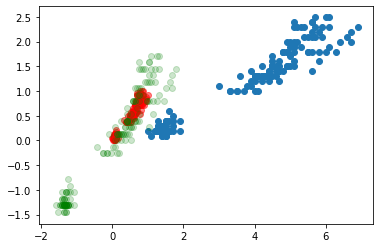

In [46]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
X=iris.data

X_minmax = MinMaxScaler().fit_transform(X) # Données plus écrasées
X_stdScaller = StandardScaler().fit_transform(X) #Données moins écrasées

plt.scatter(X[:,2], X[:,3])
plt.scatter(X_minmax[:,2], X_minmax[:,3], c='r', alpha=0.5)
plt.scatter(X_stdScaller[:,2], X_stdScaller[:,3], c='g', alpha=0.2)

plt.show()

#ces deux méthodes ont un gros défaut: elles sont sensibles aux outliers

In [44]:
X = np.array([[70],[80],[120]])
scaler = StandardScaler()
scaler.fit_transform(X) #moyenne =0, écart type=1
#utile en pce

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

In [ ]:
#Il existe un transformeur peut sensible aux outliers:
#Le robust scaler
#RobustScaler
#X Scaled = (X - MEDIAN)/ IQR
#nb: IQR: Q3-Q1

#Normalizer : normalise sur les lignes et non les colonnes
#ne pas utiliser pour débuter

## Features Engeenering

Feature engineering :
dvp un modèle polynomial

PowerTransformer : Rendre plus "normale" une distribution
Binarizer: Transformer qui permettent de discétiser des variables continues
FunctionTransformer : Implémenter sa propre fonction de transformation

Polynomial Features permet de créer une variable à partir de plusieurs variables. Il ne faut pas oublier des les normaliser. 

## Pipeline

In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train) # fit_transform le train

#Estimator
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

#Test
X_test_transformed = scaler.transform(X_test) # transform le test
model.predict(X_test_transformed)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

Il existe une méthode plus simple pour écrire ce code à l'aide d'un pipeline   

In [ ]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), SGDClassifier())
model.fit(X_train, y_train)
model.predict(X_test)

# Démonstration de cross validation avec pipeline

In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = make_pipeline(PolynomialFeatures(), StandardScaler(), SGDClassifier(random_state=0))

params = {
    'polynomialfeatures__degree':[2,3,4],
    'sgdclassifier__penalty':['l1','l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)
grid.fit(X_train, y_train)

/Users/Maxime/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('sgdclassifier',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
     

In [60]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'sgdclassifier__penalty': 'l1'}

In [61]:
grid.score(X_test, y_test)

0.9

# Pipeline avancés

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
import seaborn as sns

In [8]:
titanic = sns.load_dataset('titanic')
titanic.head() #retourne une erreur car il faut transformer les colonnes
#pour pouvoir lui appliquer une normalisation
# ----> Make_column_transformer

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [11]:
model = make_pipeline(StandardScaler(), SGDClassifier())
model.fit(X, y) #on obtient une erreur suite à la normalisation de variables qualitatives

In [19]:
from sklearn.compose import make_column_transformer #Normalisation
transformer = make_column_transformer((StandardScaler(),
                                  ['age', 'fare']))

In [20]:
transformer.fit_transform(X)

array([[-0.53037664, -0.50244517],
       [ 0.57183099,  0.78684529],
       [-0.25482473, -0.48885426],
       ...,
       [        nan, -0.17626324],
       [-0.25482473, -0.04438104],
       [ 0.15850313, -0.49237783]])

In [ ]:
#on utilise le nouveau transformer fait sur mesure dans notre pipeline
model = make_pipeline(transformer, SGDClassifier())
model.fit(X, y)

Il faut d'abord classer ses données, crééer des pipelines pour chaque catégories de features. Utiliser Make column transformer pour lier les pipelines avec les bons features puis créer un pipeline final avec ce preprocessor (variable contenant le make_column_tranformer). C'est ce dernier qu'on entraine avec le bon modèle.

In [15]:
#Dans la pratique, on distingue les variables catégorielles:
numerical_features = ['pclass', 'age', 'fare']
categorical_features = ['sex', 'deck', 'alone']

In [16]:
from sklearn.preprocessing import *
from sklearn.pipeline import *
from sklearn.linear_model import *
from sklearn.impute import *
from sklearn.compose import *

numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler()) #Normalisation pour les variables quanti
categorical_pipeline = make_pipeline(SimpleImputer(strategy ='most_frequent'),
                                    OneHotEncoder()) #One hot pour les variables quali

In [17]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                       (categorical_pipeline, categorical_features))

In [18]:
model = make_pipeline(preprocessor, SGDClassifier())
model.fit(X, y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                             

In [19]:
model.score(X,y)

0.7654320987654321

# Imputer : nettoyer ou remplacer des valeurs manquantes dans un dataset

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
X = np.array([[10,3],
              [0,4],
              [5,3],
              [np.nan, 3]])

In [21]:
imputer = SimpleImputer(missing_values=np.nan,
             strategy='mean')
#il existe 4 stratégie: remplacer par la moyenne, la médiane, la plus fréquente, ou encore
#par une constante
imputer.fit_transform(X)

array([[10.,  3.],
       [ 0.,  4.],
       [ 5.,  3.],
       [ 5.,  3.]])

In [ ]:
X_test = np.array([[10,3],
              [0,4],
              [5,3],
              [np.nan, 3]])
imputer.transform(X_test) #Attention le principe d'un transformer est de traiter toutes les données (train et test) de manière cohérente,
#donc l'imputer remplacera les valeurs manquantes du test set avec la moyenne du train set

KNNImputer = algo classique du nombre de voisin pour remplacer valeurs manquantes. Typiquement s'il me manque une valeur de classe de cabine dans le dataset du titanic, alors il va comparer les autres personnes à bord et deviner à partir de cet algo dans quelle cabine voyage la personne dont la valeur manque. 
On peut l'utiliser avec GRIDSEARCHCV pour connaitre le nombre de voisin optimal pour trouver des valeurs cohérentes.

MissingindIndicator = Il nous indique ou il manque des données dans le dataset
Ça peut être très utile pour rajouter une colonne au dataset s'il manque des données.
Par exemple les matelos n'ont pas payé de billet. Donc c'est normal qu'ils aient des valeurs manquantes.

Voyons comment ça fonctionne avec make_union**:
** Pour rappel, cette fonction permet de traiter de manière parralèle des données puis de concaténer les résultats


In [23]:
from sklearn.impute import MissingIndicator

MissingIndicator().fit_transform(X)

array([[False],
       [False],
       [False],
       [ True]])

In [25]:
pipeline = make_union(SimpleImputer(strategy='constant', fill_value=-99), #remplace par -99
                     MissingIndicator())
pipeline.fit_transform(X)
#on a ici un tableau de deux colonnes
#le premier, c'est nos données avec les valeurs manquantes
#le second c'est une colonne ou le 1 signifie qu'il manque des données
#donc avec notre hypothèse, il peut s'agir d'un matelos puisque
#il manque le prix du billet seulement pour les matelos

array([[ 10.,   3.,   0.],
       [  0.,   4.,   0.],
       [  5.,   3.,   0.],
       [-99.,   3.,   1.]])

ASTUCE DATA SCIENTIST: Le manque d'information peut devenir une information

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.impute import KNNImputer
import seaborn as sns

titanic= sns.load_dataset('titanic')
X = titanic[['pclass', 'age']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [4]:
model = make_pipeline(KNNImputer(), SGDClassifier())

In [5]:
#ici c'est le nombre de voisin pour le remplacement des données
#
params={
    'knnimputer__n_neighbors': [1,2,3,4]
}

In [6]:
grid = GridSearchCV(model, param_grid=params, cv=5)

In [7]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('knnimputer',
                                        KNNImputer(add_indicator=False,
                                                   copy=True,
                                                   metric='nan_euclidean',
                                                   missing_values=nan,
                                                   n_neighbors=5,
                                                   weights='uniform')),
                                       ('sgdclassifier',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                                      epsilon=0.1, eta0=0.0,
                           

In [8]:
grid.best_params_

{'knnimputer__n_neighbors': 4}

On a optimisé le remplacement de données manquantes avec un gridsearch cv
CHOSE qui ne serait pas possible avec le fillna de pandas 

# Feature selection

Trouver les variables les plus utiles pour notre modèle de machine learning

Quand on fournit trop de données à un modèle, ça nuit à sa performance

Dans le modèle feature selection, il y a des transformer, et des test de dépendance statistiques pour analyser encore une fois quels features nous devons sélectionner.

In [10]:
#VarianceThreshold
#Élimine les variables dont la variance est inférieur à un certain seuil

In [21]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np

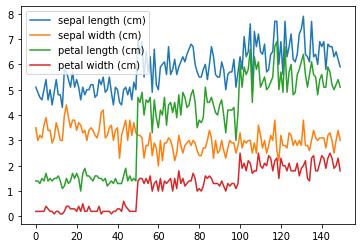

In [22]:
iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [23]:
X.var(axis=0) #variance de nos variables

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [24]:
selector = VarianceThreshold(threshold=0.2)
selector.fit_transform(X)
selector.get_support() #Les False ont été supprimés à cause de leur
#variance < threshold

array([ True, False,  True,  True])

In [25]:
#On peut s'en servir pour du boolean indexing.
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

## Test de dépendance

SelectKBest -> sélectionne les K meilleur score à un certains test statistique

In [29]:
from sklearn.feature_selection import SelectKBest, chi2

In [30]:
chi2(X,y) #premier tableau = résultat du test
#second tableau p-value

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [32]:
selector = SelectKBest(chi2, k=1) #=1, ie on veut le meilleur, on peut aussi choisir un autre nombre de meilleurs
selector.fit_transform(X, y)
selector.get_support()

array([False, False,  True, False])

In [33]:
np.array(iris.feature_names)[selector.get_support()] #boolean indexing pour trouver la valeur qui a le plus fort score chi2

array(['petal length (cm)'], dtype='<U17')

## SelectFromModel

Entraine un estimateur puis sélectionne les variables les plus importantes pour cet estimateur (compatible avec les estimateurs qui développent une fonction paramétrée).

Incompatible avec KNN par exemple car ce n'est pas un modèle paramétrée

In [40]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(SGDClassifier(random_state=0),
                          threshold='mean')
selector.fit_transform(X,y)
selector.get_support()
selector.estimator_.coef_
#on a une matrice de 150 par 4 de variables
#et en résultat on a une 150 par 3 car l'encodage one hot determine trois
#type de fleur. Il faut donc multiplier par une matrice 3, 4 pour
#obtenir notre résultat
#en colonne les coeff pour chaque variable du modèle
#en ligne les coeff pour chaque classe de y qu'on prédit

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [43]:
selector.estimator_.coef_.mean(axis=0).mean()
#le select from model va sélectionner les coeff qui sont supérieurs 
#à la moyenne suivante

-0.9721175565229512

In [44]:
selector.estimator_.coef_.mean(axis=0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

In [45]:
selector.get_support() #les deux premiers sont bien< -0.97

array([False, False,  True,  True])

## Selecteurs récursifs RFE RFECV

Ces méthodes éliminent les variables les moins importantes de façon récursive

In [47]:
from sklearn.feature_selection import RFE, RFECV
selector = RFECV(SGDClassifier(), step=1, min_features_to_select=2, cv=5)
#step= le nombre qu'on veut éliminer
selector.fit(X,y)
selector.ranking_ #les 3 dernières variables son ex aequo en terme
#d'importance tandis que la première variable est à la deuxième place

array([2, 1, 1, 1])

In [49]:
selector.grid_scores_ #quand le score diminue, l'algo récursif comprend qu'il ne faut plus en enlever

array([0.78666667, 0.87333333, 0.80666667])